In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brasil-real-estate-1/brasil-real-estate-1.csv
/kaggle/input/brazil-real-estate-dataset-2/brasil-real-estate-2.csv


In [2]:
# Let me import my 3 datasets
df1 = pd.read_csv("/kaggle/input/brasil-real-estate-1/brasil-real-estate-1.csv")

# Print object type, shape, and head
print("df type:", type(df1))
print("df shape:", df1.shape)
df1.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (12834, 7)


,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [3]:
# Let's have an overview of our data
df1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


# One of the cleaning processes is removing NaN values from the df1 DataFrame
# Secondly, I would have to split the lat and lon columns to be separate
# Also, there is need to change the data type of lat and lon to float.

In [4]:
# Drop all rows with NaN values from the DataFrame df1.
df1.dropna(inplace=True)

In [5]:
# Use the "lat-lon" column to create two separate columns in df1: 
#"lat" and "lon". Make sure that the data type for these new columns is float.
# Create "lat" and "lon" columns for df1
df1[["lat", "lon"]] = df1["lat-lon"].str.split(",", expand=True)

# Convert "lat" and "lon" columns to float
df1["lat"] = df1["lat"].astype(float)
df1["lon"] = df1["lon"].astype(float)

# Print object type, shape, and head
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
df1.head()
df1.info()

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (11551, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               11551 non-null  int64  
 1   property_type            11551 non-null  object 
 2   place_with_parent_names  11551 non-null  object 
 3   region                   11551 non-null  object 
 4   lat-lon                  11551 non-null  object 
 5   area_m2                  11551 non-null  int64  
 6   price_usd                11551 non-null  object 
 7   lat                      11551 non-null  float64
 8   lon                      11551 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 902.4+ KB


Use the "place_with_parent_names" column to create a "state" column for df1. (Note that the state name always appears after "|Brasil|" in each string.)

In [6]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]
df1

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814,Alagoas
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840,Alagoas
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795,Alagoas
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556,Alagoas
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...,...,...,...
12828,12829,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.044497,-34.909519",74,"$134,182.11",-8.044497,-34.909519,Pernambuco
12829,12830,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.056418,-34.909309",91,"$174,748.79",-8.056418,-34.909309,Pernambuco
12830,12831,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.1373477,-34.909181",115,"$115,459.02",-8.137348,-34.909181,Pernambuco
12831,12832,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,"-8.1136717,-34.896252",76,"$137,302.62",-8.113672,-34.896252,Pernambuco


Transform the "price_usd" column of df1 so that all values are floating-point numbers instead of strings.

In [7]:
# Transforming the 'price_usd' from object to float
df1["price_usd"] = (
    df1["price_usd"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "")
    .astype(float)
)
df1

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,187230.85,-9.644305,-35.708814,Alagoas
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,81133.37,-9.643093,-35.704840,Alagoas
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,154465.45,-9.622703,-35.729795,Alagoas
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,146013.20,-9.622837,-35.719556,Alagoas
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,101416.71,-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...,...,...,...
12828,12829,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.044497,-34.909519",74,134182.11,-8.044497,-34.909519,Pernambuco
12829,12830,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.056418,-34.909309",91,174748.79,-8.056418,-34.909309,Pernambuco
12830,12831,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.1373477,-34.909181",115,115459.02,-8.137348,-34.909181,Pernambuco
12831,12832,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,"-8.1136717,-34.896252",76,137302.62,-8.113672,-34.896252,Pernambuco


Drop the "lat-lon" and "place_with_parent_names" columns from df1.

In [8]:
df1.drop(["lat-lon","place_with_parent_names"], axis=1, inplace=True)
df1

,Unnamed: 0,property_type,region,area_m2,price_usd,lat,lon,state
0,1,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Alagoas
1,2,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Alagoas
2,3,house,Northeast,211,154465.45,-9.622703,-35.729795,Alagoas
3,4,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Alagoas
4,5,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...,...
12828,12829,apartment,Northeast,74,134182.11,-8.044497,-34.909519,Pernambuco
12829,12830,apartment,Northeast,91,174748.79,-8.056418,-34.909309,Pernambuco
12830,12831,apartment,Northeast,115,115459.02,-8.137348,-34.909181,Pernambuco
12831,12832,apartment,Northeast,76,137302.62,-8.113672,-34.896252,Pernambuco


In [9]:
# Now let's import our second csv
df2 = pd.read_csv("/kaggle/input/brazil-real-estate-dataset-2/brasil-real-estate-2.csv")
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


Before you jump to the next task, take a look at df2 using the info and head methods. What issues do you see in the data? How is it similar or different from df1?

In [10]:
df2.head()
df2.info()
# I realize that the currency used for house prices is in Brazilian currency. 
# I need to change this to be in usd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


Use the "price_brl" column to create a new column named "price_usd". (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In [11]:
# Then create the new column 'price_usd' from 'price_brl'
df2["price_usd"] = df2["price_brl"]/3.19

# Display the first few rows
df2

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179
...,...,...,...,...,...,...,...,...
12828,house,São Paulo,Southeast,-23.587495,-46.559401,250.0,429194.89,134543.852665
12829,apartment,São Paulo,Southeast,-23.522029,-46.189290,55.0,252398.80,79121.880878
12830,apartment,São Paulo,Southeast,-23.526443,-46.529182,57.0,319400.84,100125.655172
12831,house,Tocantins,North,-8.848399,-48.511164,NaN,529007.65,165833.119122


Drop the "price_brl" column from df2, as well as any rows that have NaN values.

In [12]:
# Drop the 'price_brl' column
df2.drop("price_brl", axis=1, inplace=True)

# Drop all rows with NaN values
df2.dropna(inplace=True)

#Display the updated df2
df2

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179
...,...,...,...,...,...,...,...
12827,house,São Paulo,Southeast,-23.595098,-46.796448,180.0,131414.921630
12828,house,São Paulo,Southeast,-23.587495,-46.559401,250.0,134543.852665
12829,apartment,São Paulo,Southeast,-23.522029,-46.189290,55.0,79121.880878
12830,apartment,São Paulo,Southeast,-23.526443,-46.529182,57.0,100125.655172


Concatenate df1 and df2 to create a new DataFrame named df.

In [13]:
df = pd.concat([df1, df2])
print("df shape:", df.shape)

df shape: (22844, 8)


In [14]:
# An overview of our concatenated data
df.head()

,Unnamed: 0,property_type,region,area_m2,price_usd,lat,lon,state
0,1.0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,2.0,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,3.0,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,4.0,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,5.0,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


Complete the code below to create a scatter_mapbox showing the location of the properties in df.WQU WorldQuant University Applied Data Science Lab 

In [15]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Use the describe method to create a DataFrame summary_stats with the summary statistics for the "area_m2" and "price_usd" columns

In [16]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


Create a histogram of "price_usd". Make sure that the x-axis has the label "Price [USD]", the y-axis has the label "Frequency", and the plot has the title "Distribution of Home Prices". Use Matplotlib (plt).

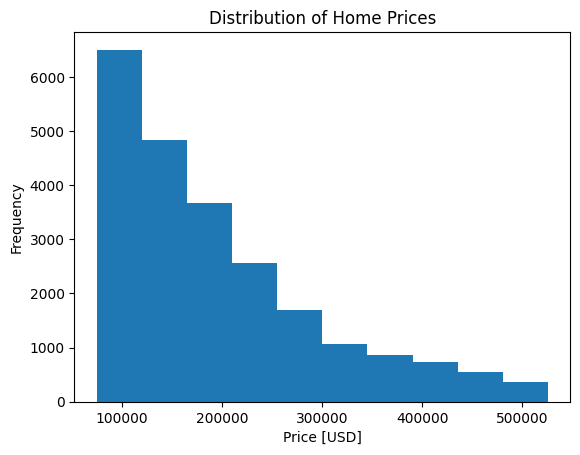

In [17]:
# Build histogram
plt.hist(df["price_usd"])


# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices")

# Show the histogram
plt.show()

Create a horizontal boxplot of "area_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Home Sizes". Use Matplotlib (plt).

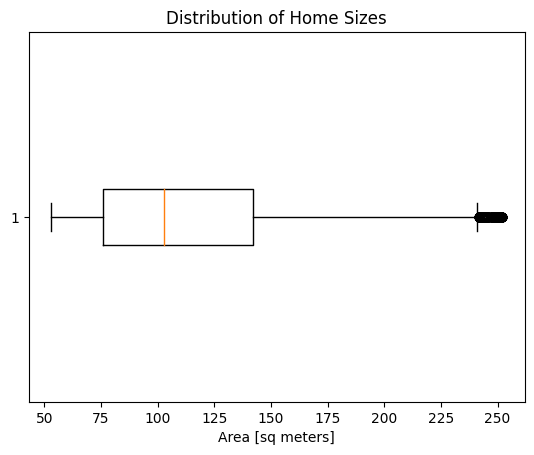

In [18]:
# Build box plot
plt.boxplot(df["area_m2"], vert=False)

# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

#Display the box plot
plt.show()

Use the groupby method to create a Series named mean_price_by_region that shows the mean home price in each region in Brazil, sorted from smallest to largest.

In [19]:
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values()
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

Use mean_price_by_region to create a bar chart. Make sure you label the x-axis as "Region" and the y-axis as "Mean Price [USD]", and give the chart the title "Mean Home Price by Region". Use pandas.

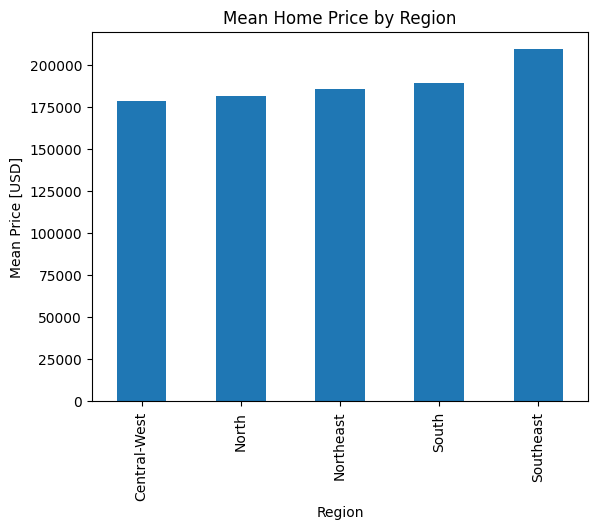

In [20]:
# Build bar chart, label axes, add title
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Home Price by Region"
);


Create a DataFrame df_south that contains all the homes from df that are in the "South" region.

In [21]:
df_south = df[df["region"] == "South"]
df_south.head()

,Unnamed: 0,property_type,region,area_m2,price_usd,lat,lon,state
9304,9305.0,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
9305,9306.0,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
9306,9307.0,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
9307,9308.0,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
9308,9309.0,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


Use the value_counts method to create a Series homes_by_state that contains the number of properties in each state in df_south.

In [22]:
# Reset the index to make it a regular DataFrame
df_south_reset = df_south.reset_index()

# Use value_counts on the 'state' column
homes_by_state = df_south_reset['state'].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

Create a scatter plot showing price vs. area for the state in df_south that has the largest number of properties. Be sure to label the x-axis "Area [sq meters]" and the y-axis "Price [USD]"; and use the title "<name of state>: Price vs. Area". Use Matplotlib (plt).

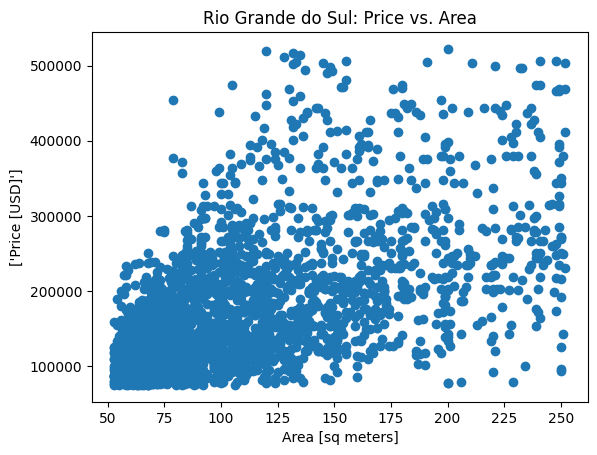

In [23]:
# Subset data

df_south_rgs = df_south[df_south["state"] == "Rio Grande do Sul"]

# Build scatter plot
plt.scatter(x=df_south_rgs["area_m2"], y=df_south_rgs["price_usd"])


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel(["Price [USD]"])

# Add title
plt.title("Rio Grande do Sul: Price vs. Area")

# Display the scatter plot
plt.show()


Create a dictionary south_states_corr, where the keys are the names of the three states in the "South" region of Brazil, and their associated values are the correlation coefficient between "area_m2" and "price_usd" in that state.

In [24]:
south_states_corr = {}

#Let's first calculate the coeefficient of 'Rio Grande do Sul'
df_south_rgs = df_south[df_south["state"] == "Rio Grande do Sul"]
correlation_coefficient_rgs = df_south_rgs["area_m2"].corr(df_south_rgs["price_usd"])
south_states_corr["Rio Grande do Sul"] = correlation_coefficient_rgs

#Then let's create the correlation co-efficient for 'Santa Catarina'
df_south_stc = df_south[df_south["state"] == "Santa Catarina"]
correlation_coefficient_stc = df_south_stc["area_m2"].corr(df_south_stc["price_usd"])
south_states_corr["Santa Catarina"] = correlation_coefficient_stc

# Finally, let's get the correlation coefficient for 'Paraná'
df_south_prn = df_south[df_south["state"] == "Paraná"]
correlation_coefficient_prn = df_south_prn["area_m2"].corr(df_south_prn["price_usd"])
south_states_corr["Paraná"] = correlation_coefficient_prn

#Display the dictionary
south_states_corr

{'Rio Grande do Sul': 0.5773267433717683,
 'Santa Catarina': 0.506812177636678,
 'Paraná': 0.5436659935502661}